In [41]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from rdkit.Chem import AllChem, Descriptors, MolFromSmiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf

In [42]:
photoswitches = pd.read_csv('./photoswitches.csv')
smiles_list = photoswitches['SMILES'].to_list()

In [43]:
null_columns = photoswitches.columns[photoswitches.isnull().any()]
photoswitches[null_columns].isnull().sum() #two columns completely empty can be removed in raw dataset

rate of thermal isomerisation from Z-E in s-1             330
Solvent used for thermal isomerisation rates              353
Z PhotoStationaryState                                    329
E PhotoStationaryState                                    331
E isomer pi-pi* wavelength in nm                           13
Extinction                                                372
E isomer n-pi* wavelength in nm                           264
Extinction coefficient in M-1 cm-1                        379
Z isomer pi-pi* wavelength in nm                          312
Extinction.1                                              393
Z isomer n-pi* wavelength in nm                           282
Extinction coefficient in M-1 cm-1.1                      382
Wiberg index                                              390
E-Z irradiation wavelength in nm                          341
Z-E irradiation wavelength                                341
Irradiation solvent                                       184
PBE0 DFT

In [54]:
photoswitches.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
dropped_data = photoswitches.drop(columns = ['a','BHLYP/6-31G* DFT E isomer pi-pi* wavelength in nm','BHLYP/6-31G* DFT E isomer n-pi* wavelength in nm','BHLYP/6-31G* Z isomer pi-pi* wavelength in nm','BHLYP/6-31G* DFT Z isomer n-pi* wavelength in nm'])
#raw_data = dropped_data.fillna(0)
dropped_data.to_csv ('rawdata_new.csv', index = False)

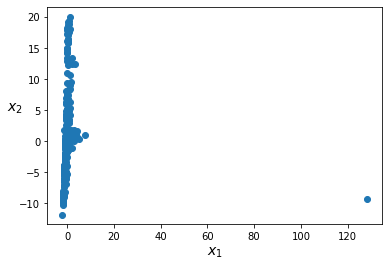

In [46]:
plt.scatter(reduced_morgfingerprint[:, 0], reduced_morgfingerprint[:, 1])
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()

In [47]:
mordred = pd.read_csv('./mordred_descriptors.csv')
mordred_num = mordred.drop(mordred.columns[[0, 1]], axis = 1)
X_1 = mordred_num
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X_1)
pca = PCA(n_components=2)
reduced_mordred = pca.fit_transform(X1_scaled)
pca.explained_variance_ratio_

array([0.29043388, 0.11875416])

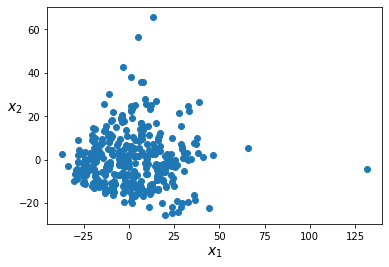

In [48]:
plt.scatter(reduced_mordred[:, 0], reduced_mordred[:, 1])
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()

In [55]:
y = dropped_data["E isomer pi-pi* wavelength in nm"]
X = reduced_morgfingerprint

X_train, X_test, y_train, y_test = train_test_split(X,y)

random_forest = RandomForestClassifier(n_estimators=500)
random_forest.fit(X_train, y_train) #having errors after i switch to the new data set will try to see what happened
y_pred = random_forest.predict(X_test)
accuracy_score(y_test, y_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [32]:
y = raw_data["E isomer pi-pi* wavelength in nm"]
X = reduced_mordred

X_train, X_test, y_train, y_test = train_test_split(X,y)

random_forest = RandomForestClassifier(n_estimators=500)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.0196078431372549